# Antes de entrarmos nos modelos iremos estudar as principais métricas de avaliação. Vejamos no tutorial como elas são.

# Classificação
* A classificação é um método de aprendizagem supervisionada (supervised learning) para atribuir um rótulo a uma amostra com base nos atributos;
* A biblioteca sklearn implementa diversos modelos úteis e comuns;
* Veremos também alguns modelos que não estão no sklearn.

## Regressão Logística
* A regressão logística estima probabilidades usando uma função logística;
* Esse tem sido o modelo de classificação padrão para a maioria das ciências.

<img src="regressao_logistica.png" width="400px" align="left"><br>

In [2]:
#Vou importar todos os modelos de classificação padrão do sklearn
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (cohen_kappa_score,confusion_matrix, accuracy_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)
import matplotlib.pyplot as plt
from yellowbrick.classifier import  ROCAUC

In [2]:
#Carregar os dados
df = pd.read_csv('titanic3_processado.csv', delimiter = ',')

In [3]:
df.head()

,passenger_id,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_24.0,embarque_C,embarque_Q,embarque_S
0,0,1,1,29.0000,0,0,14.4542,1,0,0,0,0,1
1,1,1,1,0.9167,1,2,14.4542,0,1,0,0,0,1
2,5,1,1,48.0000,0,0,26.5500,0,1,0,0,0,1
3,6,1,1,63.0000,1,0,77.9583,1,0,0,0,0,1
4,8,1,1,53.0000,2,0,51.4792,1,0,0,0,0,1


In [4]:
#Setar o passenger_id como index
df.set_index('passenger_id',inplace = True)
df.head()

,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_24.0,embarque_C,embarque_Q,embarque_S
passenger_id,,,,,,,,,,,,
0,1,1,29.0000,0,0,14.4542,1,0,0,0,0,1
1,1,1,0.9167,1,2,14.4542,0,1,0,0,0,1
5,1,1,48.0000,0,0,26.5500,0,1,0,0,0,1
6,1,1,63.0000,1,0,77.9583,1,0,0,0,0,1
8,1,1,53.0000,2,0,51.4792,1,0,0,0,0,1


In [7]:
#Vamos ver se continuam balanceados
df.sobreviveu.value_counts() 

0    500
1    500
Name: sobreviveu, dtype: int64

In [8]:
#Vamos separar a classe da variável
X = df.drop(['sobreviveu'], axis=1)
y = df['sobreviveu']

Não sobreviveu:  500
Sobreviveu :  500


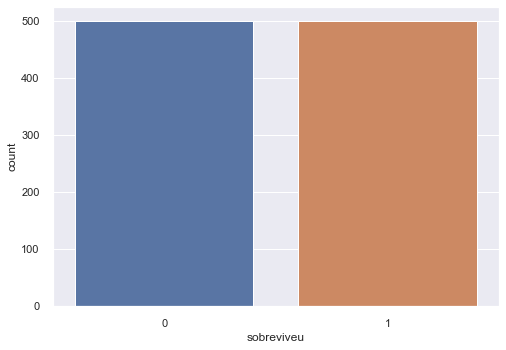

In [9]:
#Rever a distruição das amostras entre as classes
sns.set(style="darkgrid")
ax = sns.countplot(x = y)      
N, S = y.value_counts(sort=True) 
print('Não sobreviveu: ',N)
print('Sobreviveu : ',S)

### Normalização

In [10]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [11]:
X

,classe,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_24.0,embarque_C,embarque_Q,embarque_S
0,0.0,0.361169,0.000,0.000000,0.154590,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.009395,0.125,0.222222,0.154590,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.599165,0.000,0.000000,0.283957,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.787056,0.125,0.000000,0.833779,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.661795,0.250,0.000000,0.550580,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.035490,0.000,0.000000,0.082620,0.0,1.0,0.0,0.0,1.0,0.0
996,1.0,0.035490,0.125,0.222222,0.250802,1.0,0.0,0.0,0.0,0.0,1.0
997,0.0,0.686847,0.125,0.000000,0.635294,0.0,1.0,0.0,1.0,0.0,0.0
998,0.5,0.260960,0.125,0.000000,0.122995,0.0,1.0,0.0,0.0,0.0,1.0


In [49]:
#Vamos separar em treino e teste
#Obs: random_state deixa os valores aleatírios dentro de um range
#Eu posso usar 3,5,6, qualquer número inteiro que dentro de um range eu pego um sequencia de valores
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [50]:
print(len(X_treino))
print(len(X_teste))

700
300


In [51]:
#Vamos instanciar
lr = LogisticRegression(random_state=42)

In [52]:
#Treinar
lr.fit(X_treino, y_treino)

LogisticRegression(random_state=42)

In [53]:
lr.score(X_teste, y_teste)

0.7833333333333333

In [54]:
#A seguir, apresentamos algumas das características que incluiremos em cada modelo:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                        intercept_scaling=1, max_iter=100, multi_class='ovr', 
                        n_jobs=1, penalty='l2', random_state=42, solver='liblinear', 
                        tol=0.0001, verbose=0, warm_start=False)

In [55]:
lr.fit(X_treino, y_treino)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=42,
                   solver='liblinear')

In [56]:
lr.score(X_teste, y_teste)

0.79

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
cv_scores = cross_val_score(lr,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.79 0.82 0.8  0.81 0.79 0.76 0.69 0.65 0.63 0.71]
Média dos Scores = 0.7449999999999999


In [59]:
#Obter a previsões
lr_previsoes = lr.predict(X_teste)
lr_previsoes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1], d

In [60]:
# Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
lr_previsoes_prob = lr.predict_proba(X_teste)
lr_previsoes_prob

array([[0.5514989 , 0.4485011 ],
       [0.7088414 , 0.2911586 ],
       [0.80178196, 0.19821804],
       [0.69650111, 0.30349889],
       [0.79790865, 0.20209135],
       [0.57469045, 0.42530955],
       [0.50134785, 0.49865215],
       [0.1942999 , 0.8057001 ],
       [0.25450418, 0.74549582],
       [0.07939527, 0.92060473],
       [0.29491106, 0.70508894],
       [0.1661705 , 0.8338295 ],
       [0.87657173, 0.12342827],
       [0.82983983, 0.17016017],
       [0.66533885, 0.33466115],
       [0.83454351, 0.16545649],
       [0.25157279, 0.74842721],
       [0.8195691 , 0.1804309 ],
       [0.28881385, 0.71118615],
       [0.39278437, 0.60721563],
       [0.75830936, 0.24169064],
       [0.05916167, 0.94083833],
       [0.79061523, 0.20938477],
       [0.7248683 , 0.2751317 ],
       [0.19671418, 0.80328582],
       [0.23645214, 0.76354786],
       [0.3373929 , 0.6626071 ],
       [0.73377672, 0.26622328],
       [0.83095452, 0.16904548],
       [0.86811254, 0.13188746],
       [0.

### Matriz de Confusão 

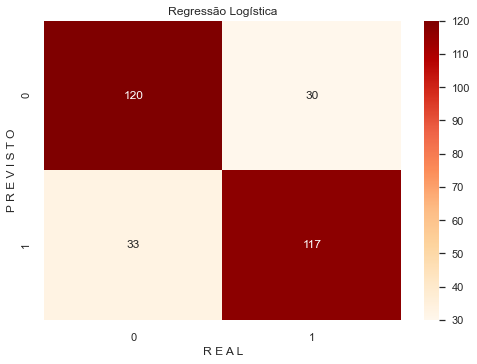

In [61]:
sns.heatmap(confusion_matrix(y_teste, lr_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [62]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,lr_previsoes)
precisao = precision_score(y_teste,lr_previsoes)
recall = recall_score(y_teste,lr_previsoes)
f1Score = f1_score(y_teste,lr_previsoes)
lr_curva_roc = roc_auc_score(y_teste,lr_previsoes)
kappa = cohen_kappa_score(y_teste,lr_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(lr_curva_roc,2)}')

Acurácia:0.79
Precisão:0.8
Recall ou Sensibilidade:0.78
F1-Score:0.79
Kappa:0.58
Curva ROC:0.79


In [63]:
print(classification_report(y_teste, lr.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       150
           1       0.80      0.78      0.79       150

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



### Curva ROC 

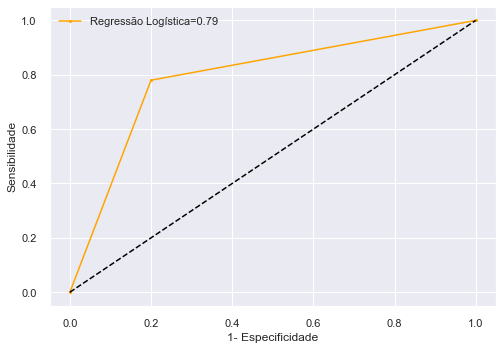

In [64]:
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_previsoes)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística='+str(round(lr_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

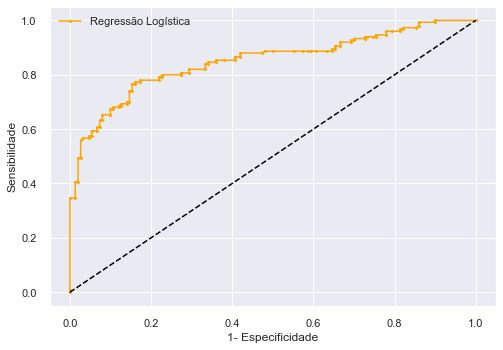

In [98]:
#Aqui estamos pegando apenas da classe 1
lr_probs = lr_previsoes_prob[:,1]
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_probs)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística',color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [67]:
X_teste

,classe,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_24.0,embarque_C,embarque_Q,embarque_S
521,0.0,0.373695,0.000,0.000000,0.278075,0.0,1.0,0.0,0.0,0.0,1.0
737,0.5,0.311064,0.000,0.000000,0.112299,0.0,1.0,0.0,0.0,0.0,1.0
740,0.5,0.874739,0.000,0.000000,0.112299,0.0,1.0,0.0,0.0,0.0,1.0
660,1.0,0.035490,0.125,0.000000,0.068850,0.0,1.0,0.0,1.0,0.0,0.0
411,1.0,0.323591,0.000,0.000000,0.604233,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
468,1.0,0.398747,0.000,0.000000,0.086096,0.0,1.0,0.0,0.0,0.0,1.0
935,1.0,0.323591,0.000,0.000000,0.084447,0.0,1.0,0.0,0.0,0.0,1.0
428,1.0,0.035490,0.000,0.000000,0.084270,1.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.323591,0.000,0.000000,0.843316,1.0,0.0,0.0,0.0,0.0,1.0


In [129]:
lr_previsoes_1 = lr.predict(X_teste[:1])
lr_previsoes_1

array([0], dtype=int64)

In [132]:
lr_previsoes_1 = lr.predict_proba(X_teste[:1])
lr_previsoes_1

array([[0.5514989, 0.4485011]])

##### OBS: Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”

## Naive Bayes

* O Naive Bayes é um classificador probabilístico que pressupõe uma independência entre os atributos dos dados; 
* É popular para aplicações de classificação de textos, por exemplo, para identificação de spams; 
* A vantagem desse modelo é que, por supor uma independência entre os atributos, ele é capaz de fazer o treinamento de um modelo com um número pequeno de amostras;
* A desvantagem é que o modelo não conseguirá capturar as interações entre os atributos;
* Há três classes no sklearn: GaussianNB, MultinomialNB e BernoulliNB. 
    - A primeira supõe uma distribuição gaussiana (atributos contínuos com uma distribuição normal);
    - A segunda é para contadores de ocorrência discretos; 
    - A terceira, para atributos booleanos discretos.

In [70]:
#Importar
from sklearn.naive_bayes import GaussianNB

In [71]:
#Vamos instanciar
nb = GaussianNB()

In [72]:
#Treinar
nb.fit(X_treino, y_treino)

GaussianNB()

In [73]:
nb.score(X_teste, y_teste)

0.5266666666666666

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [75]:
cv_scores = cross_val_score(nb,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.56 0.62 0.64 0.59 0.5  0.5  0.5  0.5  0.5  0.5 ]
Média dos Scores = 0.541


In [76]:
#Obter a previsões
nb_previsoes = nb.predict(X_teste)
nb_previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [88]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
nb_previsoes_prob = nb.predict_proba(X_teste)
nb_previsoes_prob

array([[9.99948763e-01, 5.12365946e-05],
       [9.99985659e-01, 1.43414913e-05],
       [9.99984488e-01, 1.55118444e-05],
       [9.99906324e-01, 9.36757188e-05],
       [9.99967276e-01, 3.27243208e-05],
       [9.99820539e-01, 1.79460801e-04],
       [9.99425554e-01, 5.74445876e-04],
       [9.61148621e-01, 3.88513790e-02],
       [9.82240394e-01, 1.77596059e-02],
       [8.27961205e-01, 1.72038795e-01],
       [9.82671841e-01, 1.73281589e-02],
       [9.99932758e-01, 6.72420389e-05],
       [1.00000000e+00, 1.63520955e-12],
       [9.99992319e-01, 7.68063720e-06],
       [9.99985264e-01, 1.47362722e-05],
       [9.99992319e-01, 7.68095814e-06],
       [9.91649800e-01, 8.35019984e-03],
       [9.99992280e-01, 7.71977930e-06],
       [9.82671647e-01, 1.73283526e-02],
       [9.96507334e-01, 3.49266634e-03],
       [9.99956132e-01, 4.38683387e-05],
       [8.24141971e-01, 1.75858029e-01],
       [9.99992126e-01, 7.87417475e-06],
       [9.99985652e-01, 1.43481123e-05],
       [9.940002

### Matriz de Confusão 

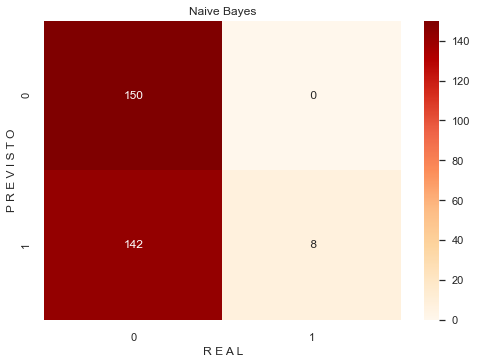

In [78]:
sns.heatmap(confusion_matrix(y_teste, nb_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Naive Bayes')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [79]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,nb_previsoes)
precisao = precision_score(y_teste,nb_previsoes)
recall = recall_score(y_teste,nb_previsoes)
f1Score = f1_score(y_teste,nb_previsoes)
nb_curva_roc = roc_auc_score(y_teste,nb_previsoes)
kappa = cohen_kappa_score(y_teste,nb_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(nb_curva_roc,2)}')

Acurácia:0.53
Precisão:1.0
Recall ou Sensibilidade:0.05
F1-Score:0.1
Kappa:0.05
Curva ROC:0.53


In [80]:
print(classification_report(y_teste, nb.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       150
           1       1.00      0.05      0.10       150

    accuracy                           0.53       300
   macro avg       0.76      0.53      0.39       300
weighted avg       0.76      0.53      0.39       300



### Curva ROC

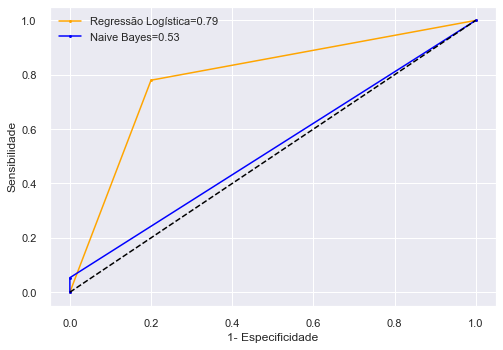

In [91]:
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_previsoes)
nb_fp,nb_vp,lim2 = roc_curve(y_teste,nb_previsoes)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística='+str(round(lr_curva_roc,2)),color="orange")
plt.plot(nb_fp,nb_vp, marker='.', label='Naive Bayes='+str(round(nb_curva_roc,2)),color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

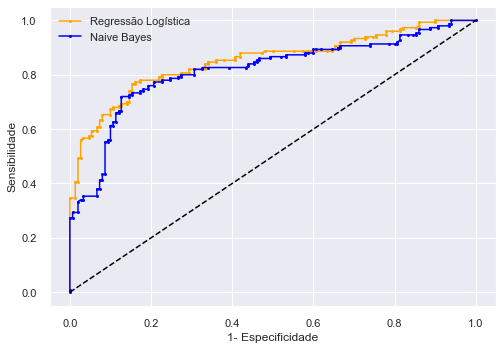

In [124]:
#Aqui estamos pegando apenas da classe 1
lr_probs = lr_previsoes_prob[:,1]
nb_probs = nb_previsoes_prob[:,1]
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_probs)
nb_fp,nb_vp,lim2 = roc_curve(y_teste,nb_probs)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística',color="orange")
plt.plot(nb_fp,nb_vp, marker='.', label='Naive Bayes',color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [133]:
nb_previsoes_1 = nb.predict(X_teste[:1])
nb_previsoes_1

array([0], dtype=int64)

In [134]:
nb_previsoes_1 = nb.predict_proba(X_teste[:1])
nb_previsoes_1

array([[9.99948763e-01, 5.12365946e-05]])

## Máquina de vetores suporte
* Uma SVM (Support Vector Machine, ou Máquina de Vetores Suporte) é um algoritmo que tenta fazer a adequação de uma linha (ou plano ou hiperplano) entre as diferentes classes de modo a maximizar a distância da linha até os pontos das classes;
* Dessa maneira, ela tenta encontrar uma separação robusta entre as classes;
* Os vetores suporte (support vectors) são os pontos da fronteira do hiperplano divisor.

Acessar o endereço: https://scikit-learn.org/stable/modules/svm.html

<img src="SVM.png" width="400px" align="left"><br>

In [99]:
from sklearn.svm import SVC

In [100]:
svc = SVC(random_state=42, probability=True)

In [102]:
svc.fit(X_treino, y_treino)

SVC(probability=True, random_state=42)

In [103]:
svc.score(X_teste, y_teste)

0.7866666666666666

In [107]:
svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', 
          degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=True, random_state=42, 
          shrinking=True, tol=0.001, verbose=False)

In [108]:
svc.fit(X_treino, y_treino)

SVC(gamma='auto', probability=True, random_state=42)

In [109]:
svc.score(X_teste, y_teste) 

0.7866666666666666

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [111]:
cv_scores = cross_val_score(svc,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.77 0.79 0.76 0.77 0.82 0.78 0.74 0.69 0.7  0.74]
Média dos Scores = 0.756


In [116]:
#Obter a previsões
svc_previsoes = svc.predict(X_teste)
svc_previsoes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1], d

In [117]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
svc_previsoes_prob = svc.predict_proba(X_teste)
svc_previsoes_prob

array([[0.70926572, 0.29073428],
       [0.71304685, 0.28695315],
       [0.71423477, 0.28576523],
       [0.71265626, 0.28734374],
       [0.71263076, 0.28736924],
       [0.70275879, 0.29724121],
       [0.70345552, 0.29654448],
       [0.20652076, 0.79347924],
       [0.20682563, 0.79317437],
       [0.2007264 , 0.7992736 ],
       [0.20661296, 0.79338704],
       [0.21004282, 0.78995718],
       [0.71493672, 0.28506328],
       [0.71282536, 0.28717464],
       [0.71053712, 0.28946288],
       [0.71283014, 0.28716986],
       [0.20259929, 0.79740071],
       [0.71279724, 0.28720276],
       [0.20665582, 0.79334418],
       [0.21363832, 0.78636168],
       [0.71262972, 0.28737028],
       [0.20082835, 0.79917165],
       [0.71219859, 0.28780141],
       [0.71351401, 0.28648599],
       [0.20078405, 0.79921595],
       [0.20212154, 0.79787846],
       [0.69585608, 0.30414392],
       [0.71373558, 0.28626442],
       [0.71286314, 0.28713686],
       [0.71273935, 0.28726065],
       [0.

### Matriz de Confusão

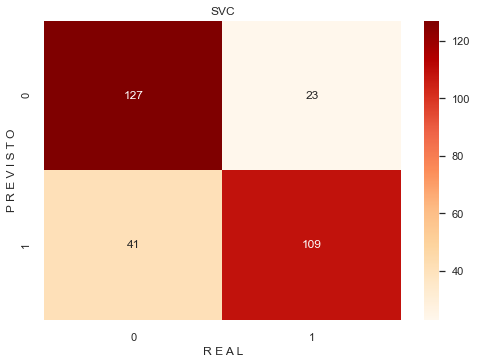

In [118]:
sns.heatmap(confusion_matrix(y_teste, svc_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [119]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,svc_previsoes)
precisao = precision_score(y_teste,svc_previsoes)
recall = recall_score(y_teste,svc_previsoes)
f1Score = f1_score(y_teste,svc_previsoes)
svc_curva_roc = roc_auc_score(y_teste,svc_previsoes)
kappa = cohen_kappa_score(y_teste,svc_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(svc_curva_roc,2)}')

Acurácia:0.79
Precisão:0.83
Recall ou Sensibilidade:0.73
F1-Score:0.77
Kappa:0.57
Curva ROC:0.79


In [120]:
print(classification_report(y_teste, svc.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       150
           1       0.83      0.73      0.77       150

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



### Curva ROC

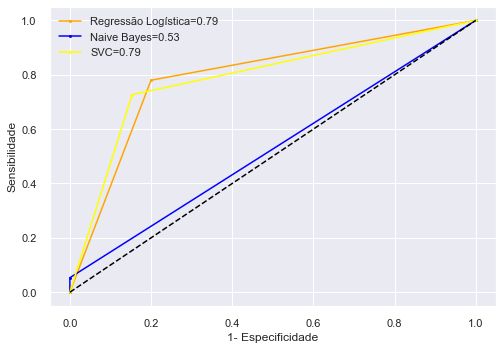

In [121]:
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_previsoes)
nb_fp,nb_vp,lim2 = roc_curve(y_teste,nb_previsoes)
svc_fp,svc_vp,lim3 = roc_curve(y_teste,svc_previsoes)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística='+str(round(lr_curva_roc,2)),color="orange")
plt.plot(nb_fp,nb_vp, marker='.', label='Naive Bayes='+str(round(nb_curva_roc,2)),color="blue")
plt.plot(svc_fp,svc_vp, marker='.', label='SVC='+str(round(svc_curva_roc,2)),color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

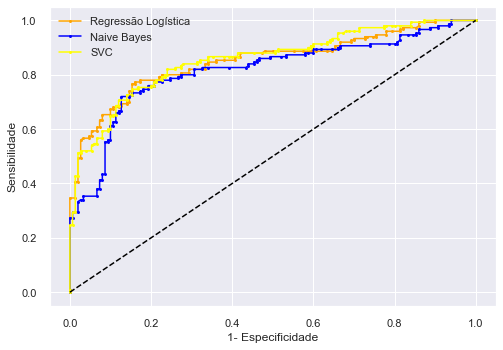

In [125]:
#Aqui estamos pegando apenas da classe 1
lr_probs = lr_previsoes_prob[:,1]
nb_probs = nb_previsoes_prob[:,1]
svc_probs = svc_previsoes_prob[:,1]
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_probs)
nb_fp,nb_vp,lim2 = roc_curve(y_teste,nb_probs)
svc_fp,svc_vp,lim3 = roc_curve(y_teste,svc_probs)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística',color="orange")
plt.plot(nb_fp,nb_vp, marker='.', label='Naive Bayes',color="blue")
plt.plot(svc_fp,svc_vp, marker='.', label='SVC',color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [135]:
svc_previsoes_1 = svc.predict(X_teste[:1])
svc_previsoes_1

array([0], dtype=int64)

In [136]:
svc_previsoes_1 = svc.predict_proba(X_teste[:1])
svc_previsoes_1

array([[0.70926572, 0.29073428]])

### Referências

### Harrison, Matt. Machine Learning – Guia de Referência Rápida. Novatec Editora. Edição do Kindle. 
### Regressão Logística. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Acesso em 05/10/2022.
### GaussianNB. Disponível em:https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussiannb#sklearn.naive_bayes.GaussianNB .Acesso em 05/10/2022.
### SVC. Disponível em:https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC. Acesso em 10/10/2022.
### Yellowbrick. Disponível em: https://www.scikit-yb.org/en/latest/. Acesso em 05/10/2022.